In [49]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


os.makedirs('./plots', exist_ok=True)
G_VALUES = ["0", "1", "4", "H"]
sns.set()

# Przebiegi dla genotypów

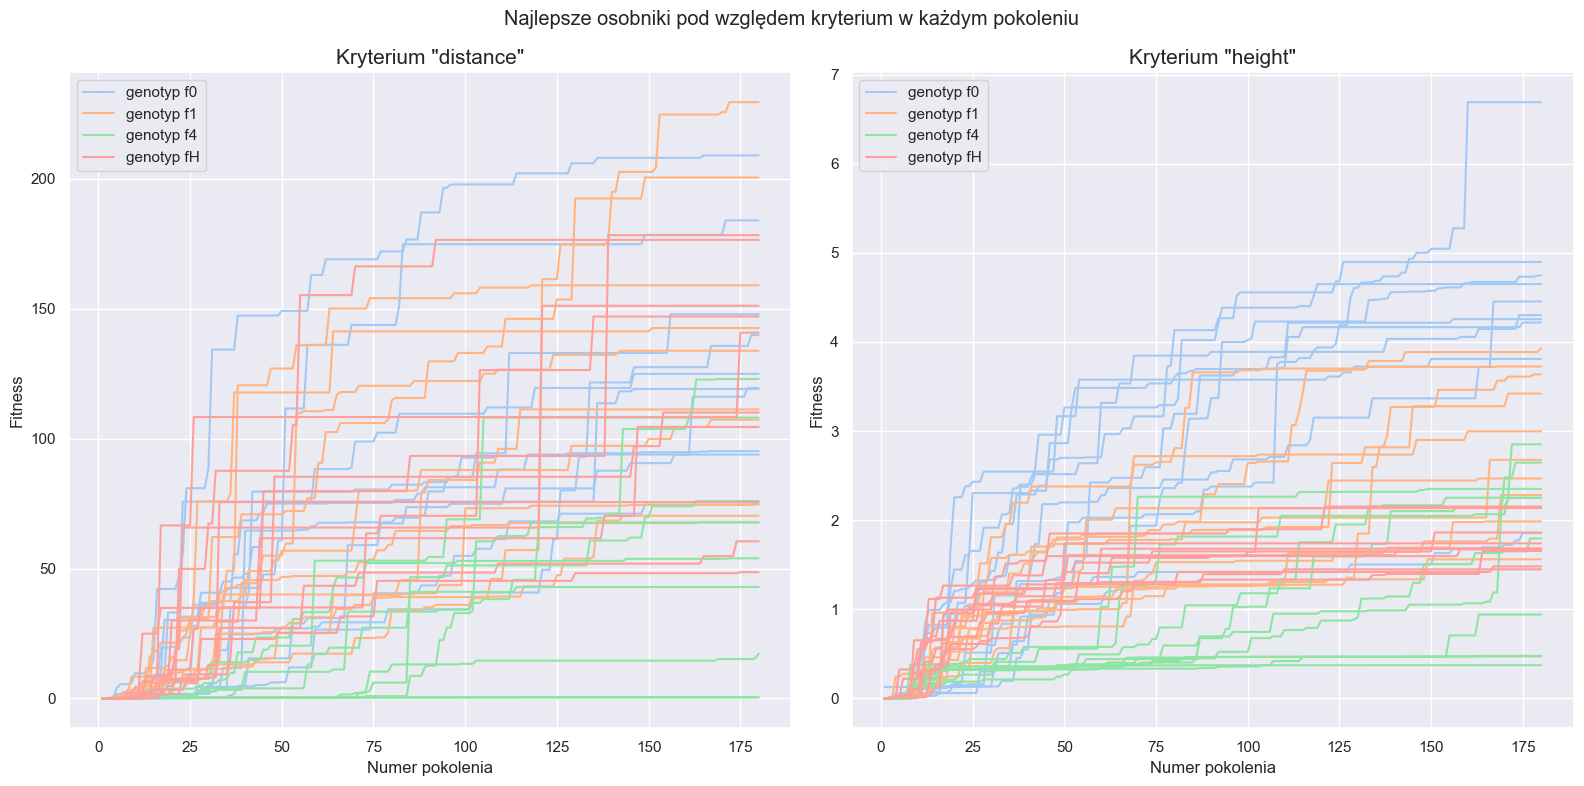

In [50]:
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# DISTANCE
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        data = {"distance": []}
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_distance = 0
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
                data["distance"].append(best_distance)     

        df = pd.DataFrame(data)
        sns.lineplot(
            df,
            x=range(1, len(df)+1),
            y="distance",
            color=color_map[g_value],
            label=f"genotyp f{g_value}" if iteration_path.name == "1" else "",
            ax=axes[0]
        )
axes[0].set_title("Kryterium \"distance\"", fontsize=15)
axes[0].set_ylabel("Fitness")
axes[0].set_xlabel("Numer pokolenia")

# HEIGHT
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        data = {"height": []}
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_height = 0
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
                data["height"].append(best_height)     

        df = pd.DataFrame(data)
        sns.lineplot(
            df,
            x=range(1, len(df)+1),
            y="height",
            color=color_map[g_value],
            label=f"genotyp f{g_value}" if iteration_path.name == "1" else "",
            ax=axes[1]
        )

axes[1].set_title("Kryterium \"height\"", fontsize=15)
axes[1].set_ylabel("Fitness")
axes[1].set_xlabel("Numer pokolenia")

plt.suptitle("Najlepsze osobniki pod względem kryterium w każdym pokoleniu")
plt.tight_layout()
plt.savefig('plots/1-przebiegi.png')
plt.show()

# Przebiegi zagregowane

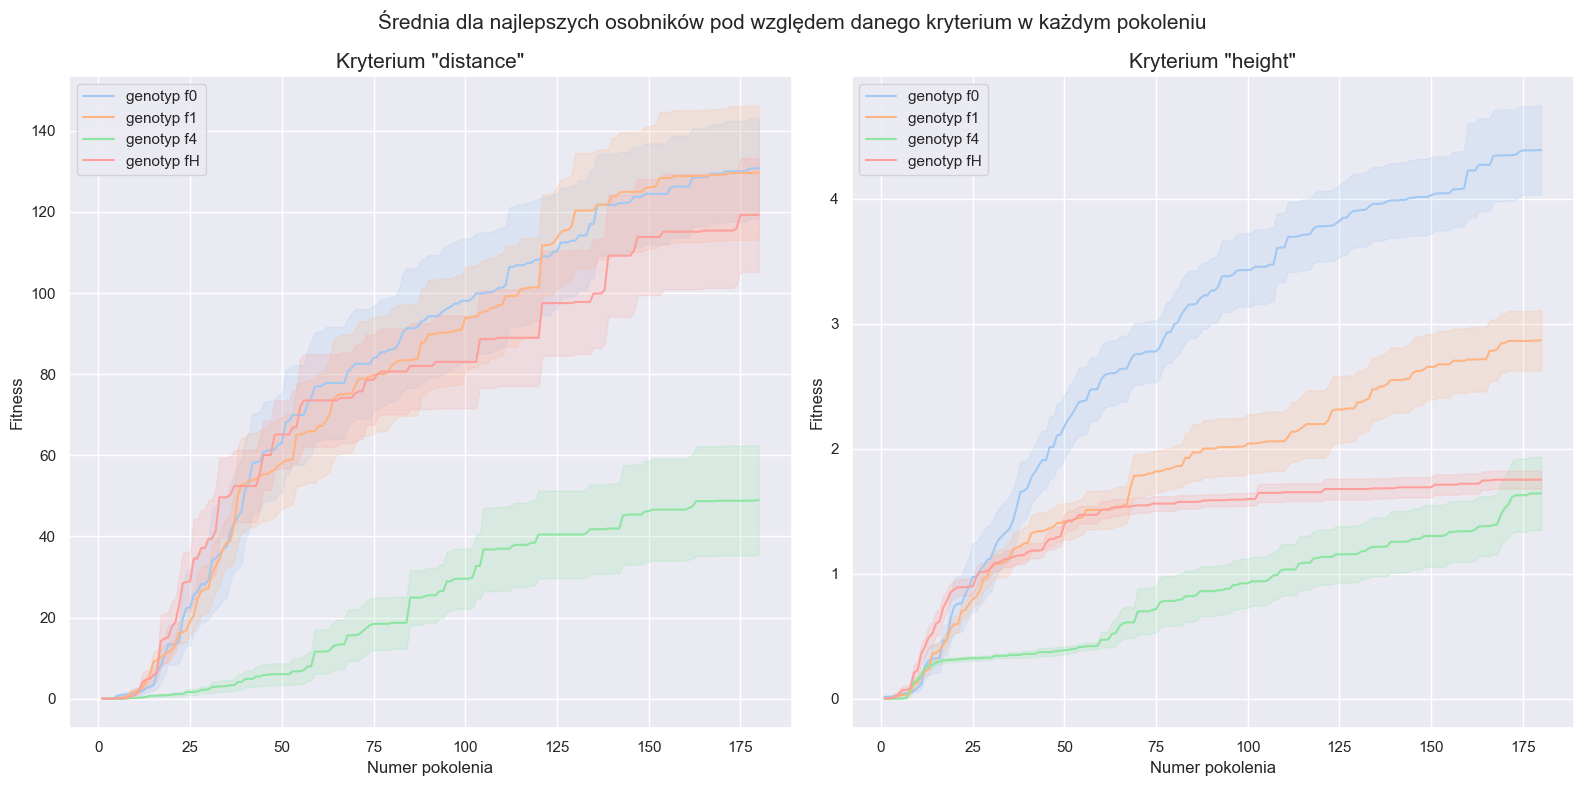

In [52]:
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# Distance
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"distance": [], "iteration": [], "generation": []}
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_distance = 0
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
                data["distance"].append(best_distance)
                data["iteration"].append(int(iteration_path.name))
                data["generation"].append(int(generation_file.stem))
    df = pd.DataFrame(data)
    sns.lineplot(df, x="generation", y="distance", color=color_map[g_value], label=f"genotyp f{g_value}", errorbar=("sd", 0.3), ax=axes[0])
axes[0].set_title("Kryterium \"distance\"", fontsize=15)
axes[0].set_ylabel("Fitness")
axes[0].set_xlabel("Numer pokolenia")

# Height
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"height": [], "iteration": [], "generation": []}
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_height = 0
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
                data["height"].append(best_height)
                data["iteration"].append(int(iteration_path.name))
                data["generation"].append(int(generation_file.stem))
    df = pd.DataFrame(data)
    sns.lineplot(df, x="generation", y="height", color=color_map[g_value], label=f"genotyp f{g_value}", errorbar=("sd", 0.3), ax=axes[1])
axes[1].set_title("Kryterium \"height\"", fontsize=15)
axes[1].set_ylabel("Fitness")
axes[1].set_xlabel("Numer pokolenia")

plt.suptitle("Średnia dla najlepszych osobników pod względem danego kryterium w każdym pokoleniu", fontsize=15)
plt.tight_layout()
plt.savefig('./plots/2-przebiegi-agregacja.png')
plt.show()

# Boxplot

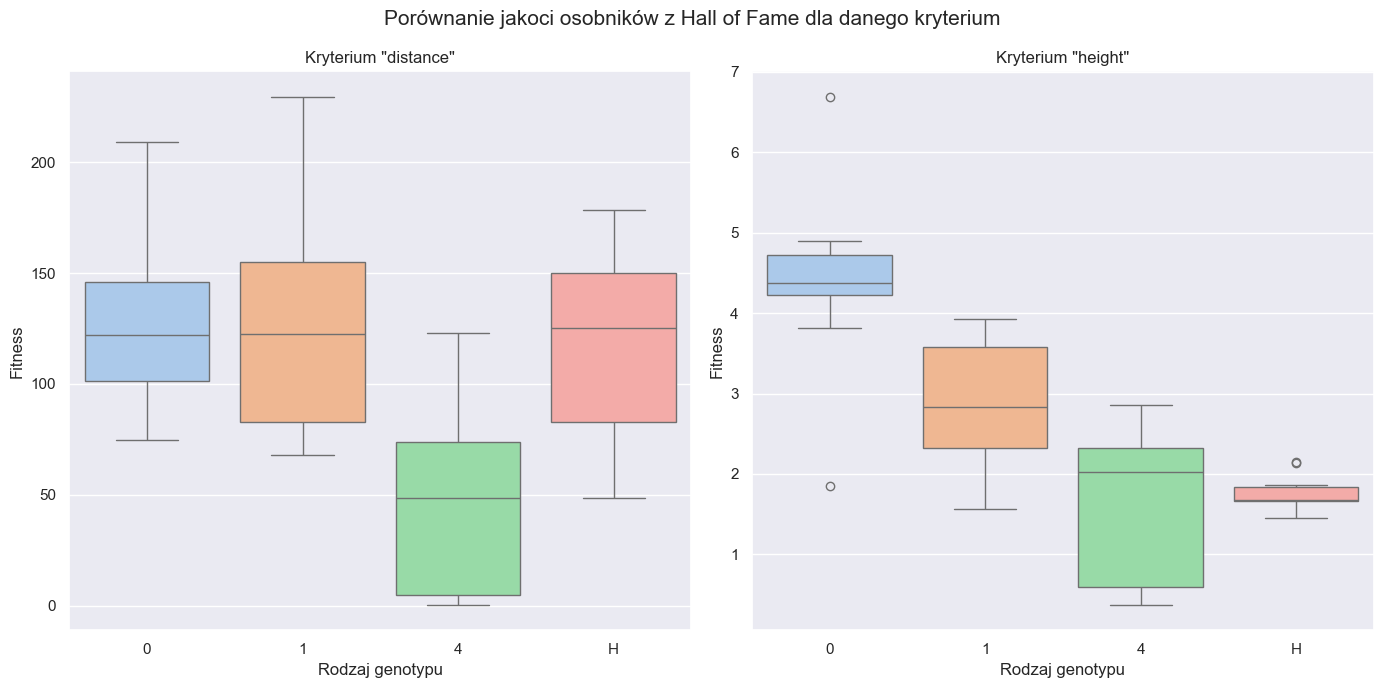

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# Distance
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        best_distance = 0
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
        data[g_value].append(best_distance)

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[0])
axes[0].set_title("Kryterium \"distance\"")
axes[0].set_xlabel("Rodzaj genotypu")
axes[0].set_ylabel("Fitness")

# Height
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        best_height = 0
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
        data[g_value].append(best_height)

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[1])
axes[1].set_title("Kryterium \"height\"")
axes[1].set_xlabel("Rodzaj genotypu")
axes[1].set_ylabel("Fitness")

plt.suptitle("Porównanie jakoci osobników z Hall of Fame dla danego kryterium", fontsize=15)
plt.tight_layout()
plt.savefig('./plots/1-boxplot.png')
plt.show()

# Analiza frontów Pareto

## Wszystkie osobniki

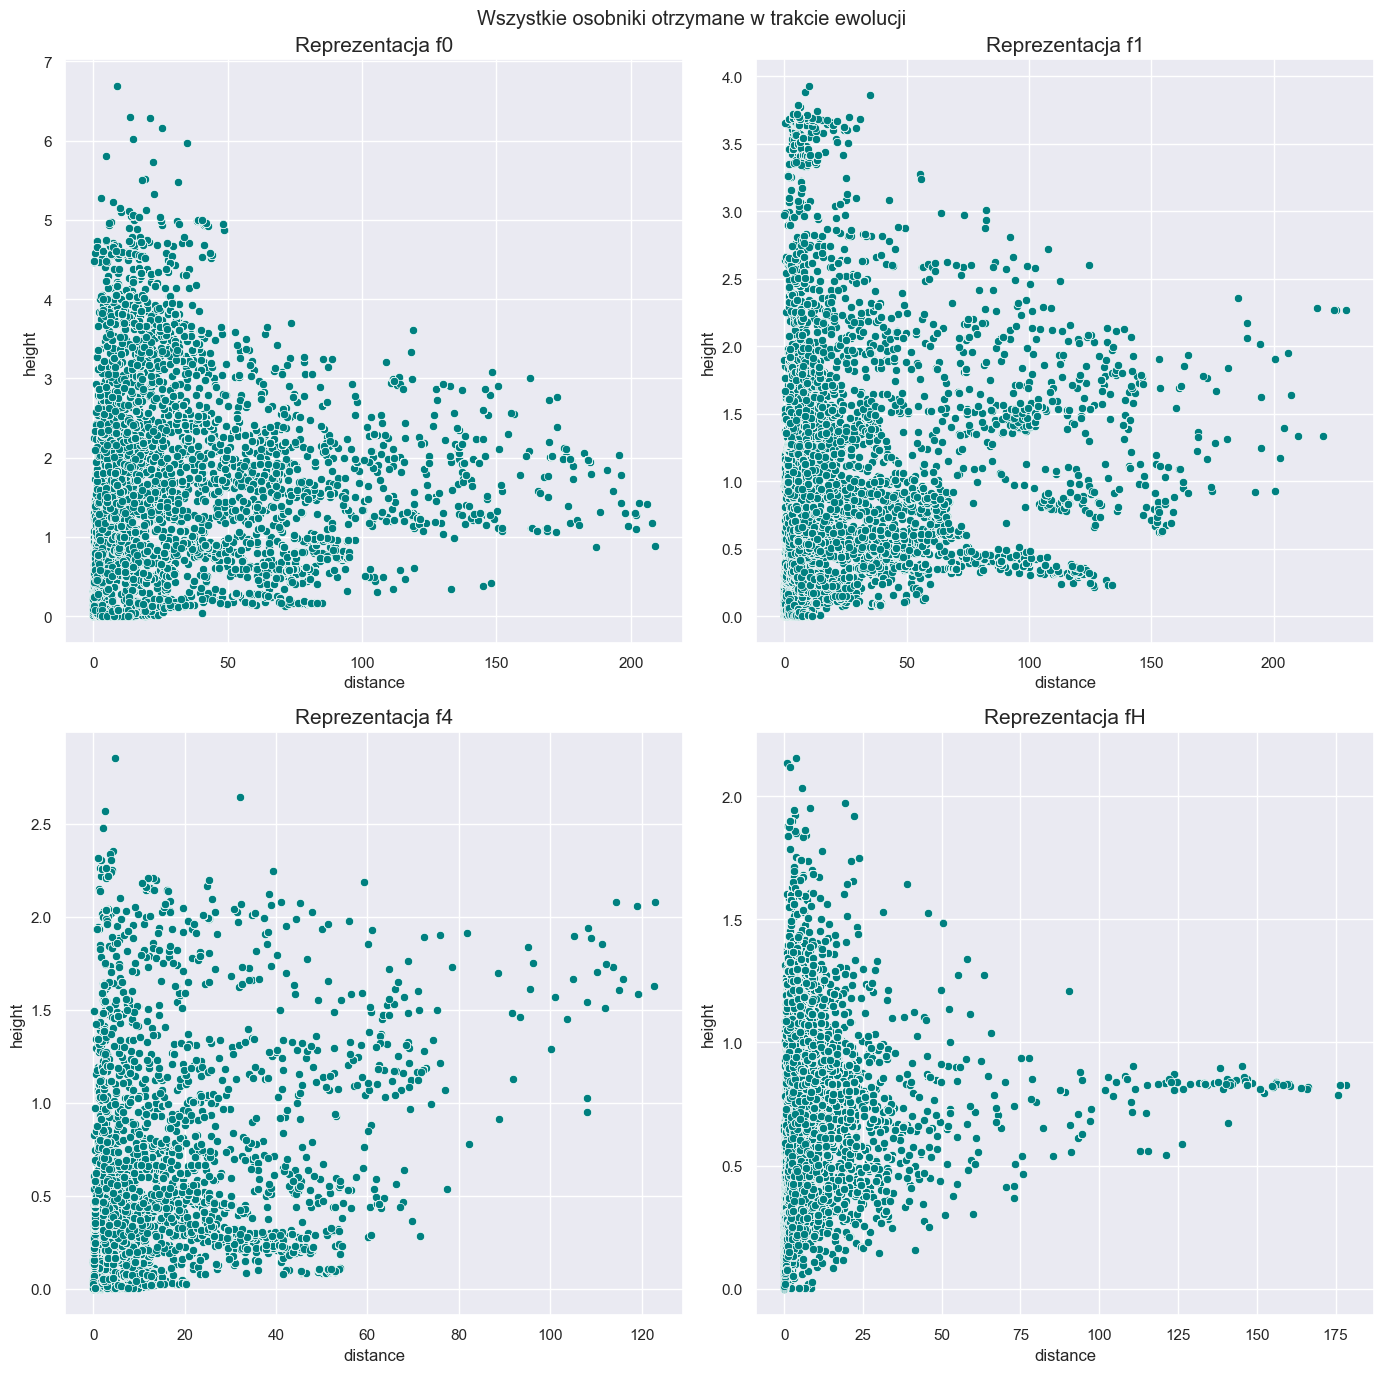

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

base_path = Path("../framspy/lab7")
for i, g_value in enumerate(G_VALUES):
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"distance": [], "height": []}
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data["distance"].append(float(line.split(':')[1]))     
                    if line.startswith("1:"):
                        data["height"].append(float(line.split(':')[1]))

    df = pd.DataFrame(data)
    sns.scatterplot(df, x="distance", y="height", ax=axes[i], color="teal")
    axes[i].set_title(f"Reprezentacja f{g_value}", fontsize=15)

plt.suptitle("Wszystkie osobniki otrzymane w trakcie ewolucji")
plt.tight_layout()
plt.savefig("./plots/4-pareto-all.png")
plt.show()

## Animacja - przebieg ewolucji z historia

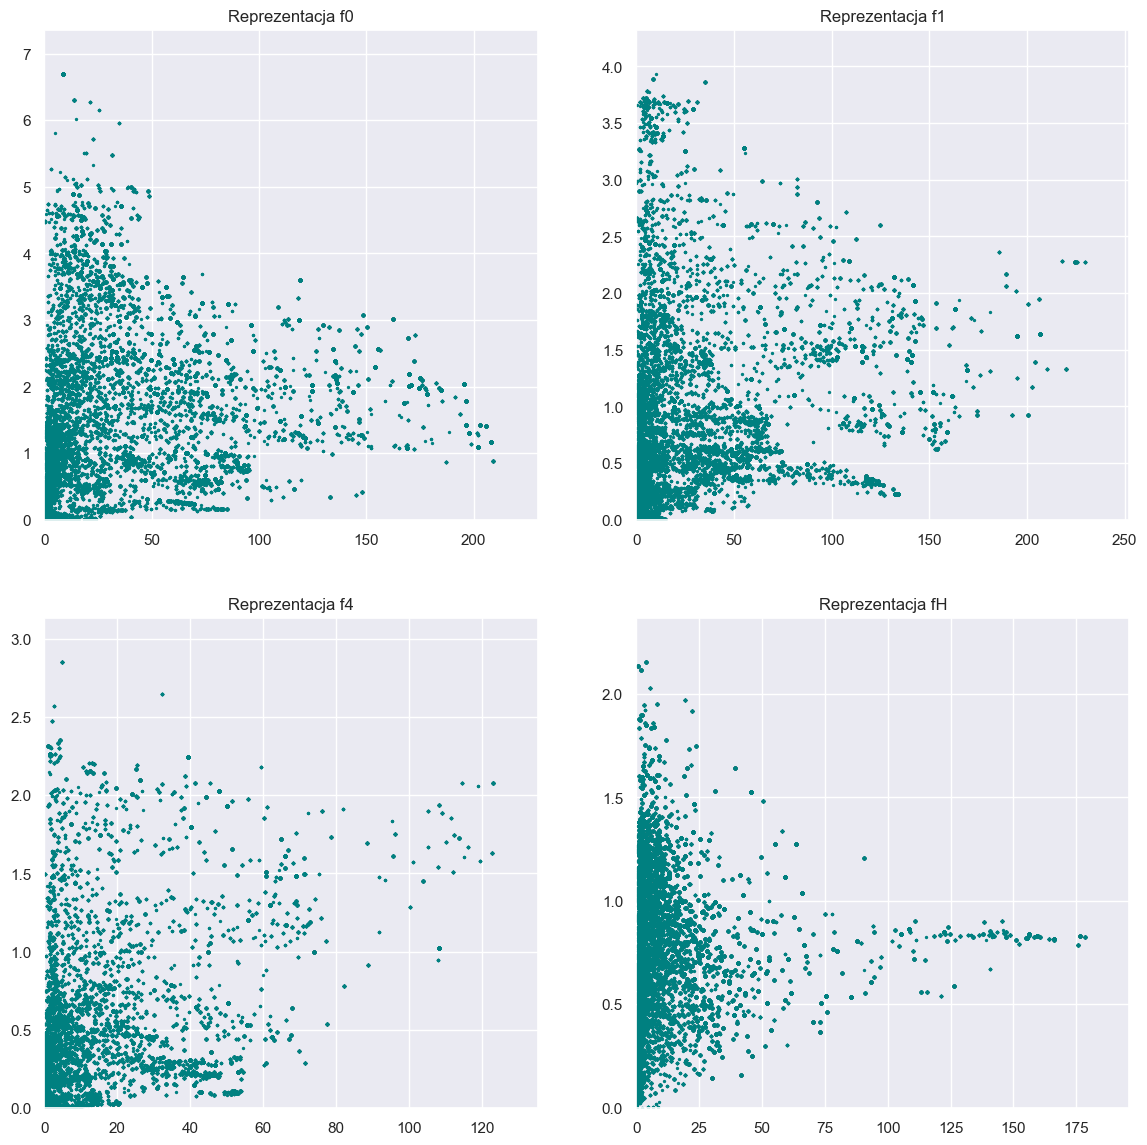

In [75]:
sns.set_style("darkgrid")
data = {g_value: {"distance": [], "height": []} for g_value in G_VALUES}

base_path = Path("../framspy/lab7")
# Function to read data for a given frame
def read_frame_data(frame):
    for i, g_value in enumerate(G_VALUES):
        g_path = base_path / f"f{g_value}/genotypes"
        for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
            generation_file = iteration_path / f"{frame}.gen"        
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data[g_value]["distance"].append(float(line.split(':')[1]))     
                    if line.startswith("1:"):
                        data[g_value]["height"].append(float(line.split(':')[1]))
    
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()


def get_max_value(genotype, criterion):
    g_path = base_path / f"f{genotype}/genotypes"
    best = 0
    for iteration_path in sorted(g_path.iterdir(), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith(f"{criterion}:"):
                        best = max(best, float(line.split(':')[1]))
    return best

plots = {}
for i, g_value in enumerate(G_VALUES):
    axes[i].set_xlim(0, get_max_value(g_value, 0)*1.1)
    axes[i].set_ylim(0, get_max_value(g_value, 1)*1.1)
    axes[i].set_title(f"Reprezentacja f{g_value}")
    plots[g_value] = axes[i].scatter([], [], s=2, color='teal')

# Update function for animation
def update(frame):
    read_frame_data(frame + 1)  # Read the data for the current frame
    for i, g_value in enumerate(G_VALUES):
        df = pd.DataFrame(data[g_value])  # Convert updated data to a DataFrame
        plots[g_value].set_offsets(df[['distance', 'height']].values)  # Update scatter points
    return [plots[g_value] for g_value in G_VALUES]

# Create the animation
frame_dir = base_path / f"f{G_VALUES[0]}/genotypes/1"
frames = len(list(frame_dir.glob("*.gen")))
ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Show the animation
ani.save("./plots/4-animation_all.gif", writer="pillow")
plt.show()

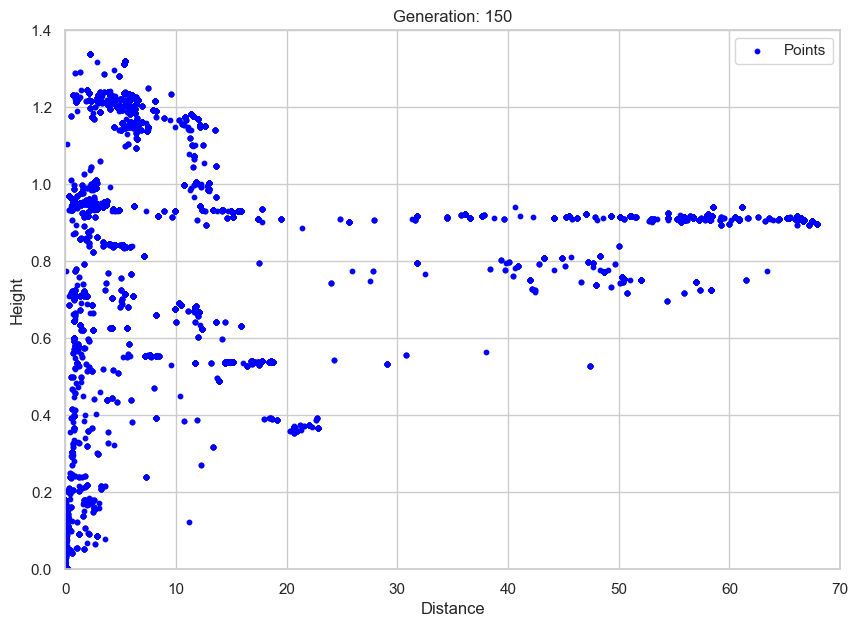

In [33]:
# Initialize an empty dictionary for the data
data = {"distance": [], "height": []}

# Function to read data for a given frame
def read_frame_data(frame):
    with open(f"../framspy/lab7/init_start/{frame}.gen") as file:
        for line in file:
            if line.startswith("0:"):
                data["distance"].append(float(line.split(':')[1]))
            if line.startswith("1:"):
                data["height"].append(float(line.split(':')[1]))


# Set up the figure
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="whitegrid")
scat = ax.scatter([], [], s=10, color='blue', label='Points')

# Set plot limits (adjust based on your data range if needed)
ax.set_xlim(0, 70)  # Replace with your actual data limits
ax.set_ylim(0, 1.4)  # Replace with your actual data limits
ax.set_xlabel("Distance")
ax.set_ylabel("Height")
ax.legend()

# Update function for animation
def update(frame):
    read_frame_data(frame + 1)  # Read the data for the current frame
    df = pd.DataFrame(data)    # Convert updated data to a DataFrame
    scat.set_offsets(df[['distance', 'height']].values)  # Update scatter points
    ax.set_title(f"Generation: {frame + 1}")  # Update the title with the current frame number
    return scat, ax.title  # Return updated elements

# Create the animation
ani = FuncAnimation(fig, update, frames=150, interval=100, blit=True)

# Show the animation
ani.save("animation_all.gif", writer="pillow")
plt.show()

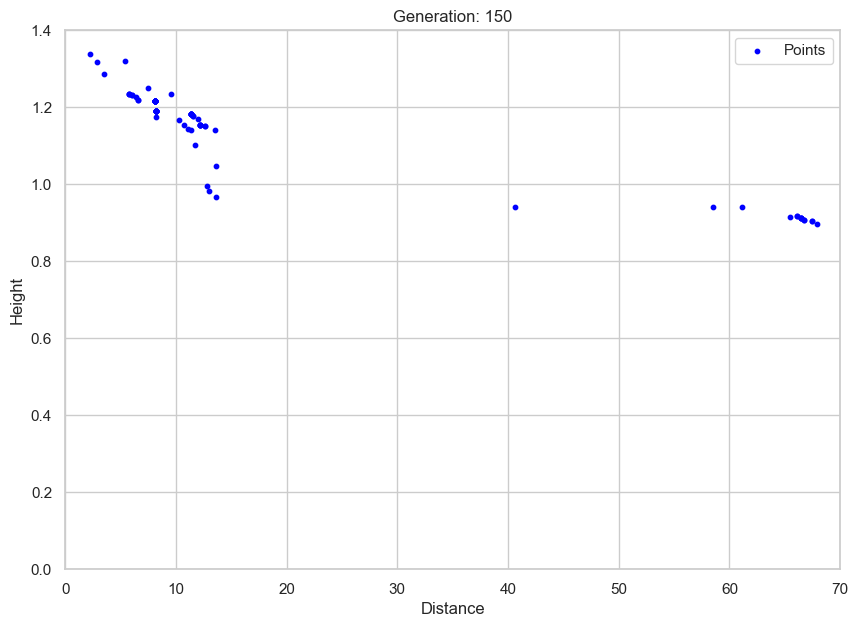

In [37]:
# import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Initialize an empty dictionary for the data
data = {"distance": [], "height": []}

# Function to read data for a given frame
def read_frame_data(frame):
    data = {"distance": [], "height": []}
    with open(f"../framspy/lab7/init_start/{frame}.gen") as file:
        for line in file:
            if line.startswith("0:"):
                data["distance"].append(float(line.split(':')[1]))
            if line.startswith("1:"):
                data["height"].append(float(line.split(':')[1]))

    return data

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="whitegrid")
scat = ax.scatter([], [], s=10, color='blue', label='Points')

# Set plot limits (adjust based on your data range if needed)
ax.set_xlim(0, 70)  # Replace with your actual data limits
ax.set_ylim(0, 1.4)  # Replace with your actual data limits
ax.set_xlabel("Distance")
ax.set_ylabel("Height")
ax.legend()

# Update function for animation
def update(frame):
    data = read_frame_data(frame + 1)  # Read the data for the current frame
    df = pd.DataFrame(data)    # Convert updated data to a DataFrame
    scat.set_offsets(df[['distance', 'height']].values)  # Update scatter points
    ax.set_title(f"Generation: {frame + 1}")  # Update the title with the current frame number
    return scat, ax.title  # Return updated elements

# Create the animation
ani = FuncAnimation(fig, update, frames=150, interval=100, blit=True)

# Show the animation
ani.save("animation_generation.gif", writer="pillow")
plt.show()